In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            

(2, 200)
(1, 200)


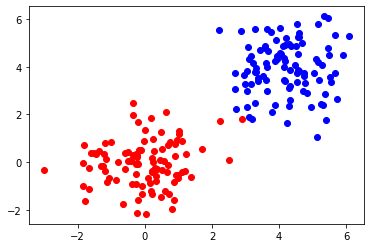

In [4]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')

print(X.shape)
print(y.shape)

In [8]:
X = X.T
y = y.T

In [34]:
class StochasticGradientDecent:
    def __init__(self,features,targets,cycles=15000,learning_rate=1e-5, batch_size=10, ) -> None:
        self._features = features
        self._targets = targets
        self._cycles = cycles
        self._weights = np.array([[1.1],[1.1]])
        self._intercept = 0
        self._learning_rate = learning_rate
        self._batch_size = batch_size
        self._X_batch = 0
        self._Y_batch = 0
        self._lossl = []


    def shape_confirm(self):
        print("features")
        print(self._features.shape)

        print("targets")
        print(self._targets.shape)

        print('weights')
        print(self._weights.shape)




    def mini_batch(self):
        mini_batch = np.random.randint(0,X.shape[0],10)

        batch_x = self._features[mini_batch,:]
        batch_y = self._targets[mini_batch,:]

        return batch_x, batch_y



    def sgd(self):


    




    def yhat(self):
        z = self.linear(self._weights,self._features,self._intercept)
        self._yhat = self.sigmoid(z)

        return self.sigmoid(z)    



    def training(self):
        lossl = []

        for i in range(self._cycles):

            # Forward Pass

            z = self.linear(weights=self._weights,features=self._features,intercept=self._intercept)

            yhat = self.sigmoid(z)

            losses = self.loss(self._targets,yhat)
    
            lossl.append(losses)



            # Backward Pass

            djdz = yhat - self._targets
            djdw = djdz.T @ self._features


            ones = np.ones(self._features.shape[0])
            ones = ones.reshape(-1,1)

            djdb = djdz.T @ ones


            # Update weights

            x = self._learning_rate*djdw

            self._weights -= self._learning_rate*djdw.T
            self._intercept -= self._learning_rate*djdb.T


    
        return lossl, yhat     


    @staticmethod
    def plotClass(X,y,p):
        
        for i in range(y.shape[1]):
            if y[0,i]==0:
                plt.plot(X[0,i],X[1,i],'r'+p)
            else:
                plt.plot(X[0,i],X[1,i],'b'+p)
            
    
    @staticmethod
    def sigmoid(z):
        return 1/(1 + np.exp(-z))
    
    @staticmethod
    def linear(weights,features,intercept):
        return features@weights + intercept

    @staticmethod
    def loss(y,yhat):
        return np.sum(-y * np.log(yhat)-(1-y)*np.log(1-yhat),axis =0)

In [11]:
Model = StochasticGradientDecent(X,y)
out = Model.training()




In [12]:
yhat = Model.yhat()

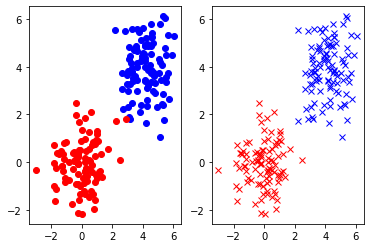

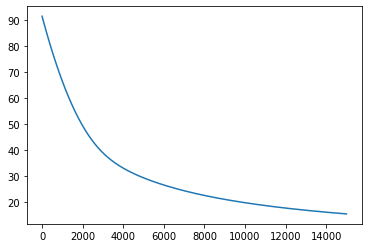

In [17]:

plt.figure()
plt.subplot(121)
plotClass(X.T,y.T,'o')
plt.subplot(122)
plotClass(X.T, yhat.T > 0.5,'x') 
        # x1 = np.reshape(np.linspace(-2,7,2),(-1,1)) # This I need to understand better.
        # x2 = (- self._intercept - (self._weights[0,0]*x1))/self._weights[0,1]
        # plt.plot(x1,x2)

plt.figure()
plt.plot(out[0])



In [50]:
y.shape

(200, 1)

In [51]:
yhat.shape

(200, 1)

In [56]:
def loss(y,yhat):
        return np.sum(-y * np.log(yhat)-(1-y)*np.log(1-yhat),axis =0)

In [57]:
loss(y,yhat)

array([19.59831781])

In [33]:
mini_batch = np.random.randint(0,X.shape[0],10)

mini_batch

array([167,  65,  85, 189, 124, 178, 124,  55,  93, 138])

In [27]:
X[:,1]

(200,)

In [32]:
X.shape[0]

200